In [269]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [271]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [272]:
df.shape

(6607, 20)

In [273]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [274]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [275]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Since a small portion of data is missing, dropping those rows won't have a significant effect

In [276]:
# drop rows with missing values
df.dropna(inplace=True)

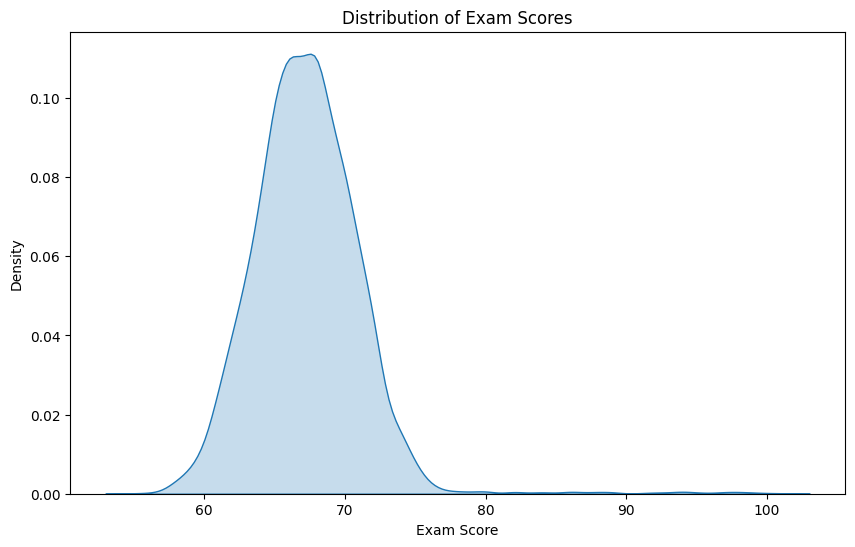

In [277]:
# make a kde plot of exam_scores
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Exam_Score'],fill=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Density')
plt.show()


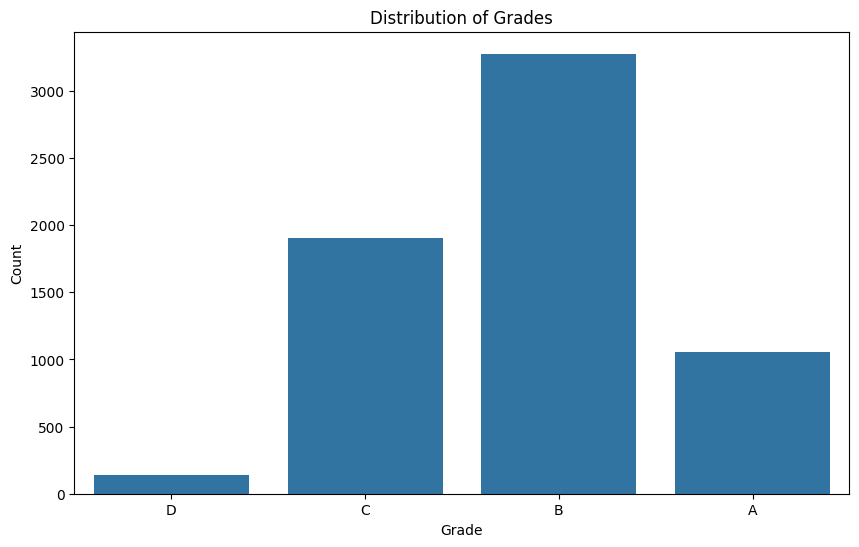

In [278]:
def categorize_score(score):
    if score > 70:
        return 'A'
    elif 66 <= score <= 70:
        return 'B'
    elif 61 <= score <= 65:
        return 'C'
    else:
        return 'D'

# Assuming df is your dataframe and 'Exam_Score' is the column with scores
df['Grade'] = df['Exam_Score'].apply(categorize_score)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Grade', data=df, order=['D', 'C', 'B', 'A'])
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

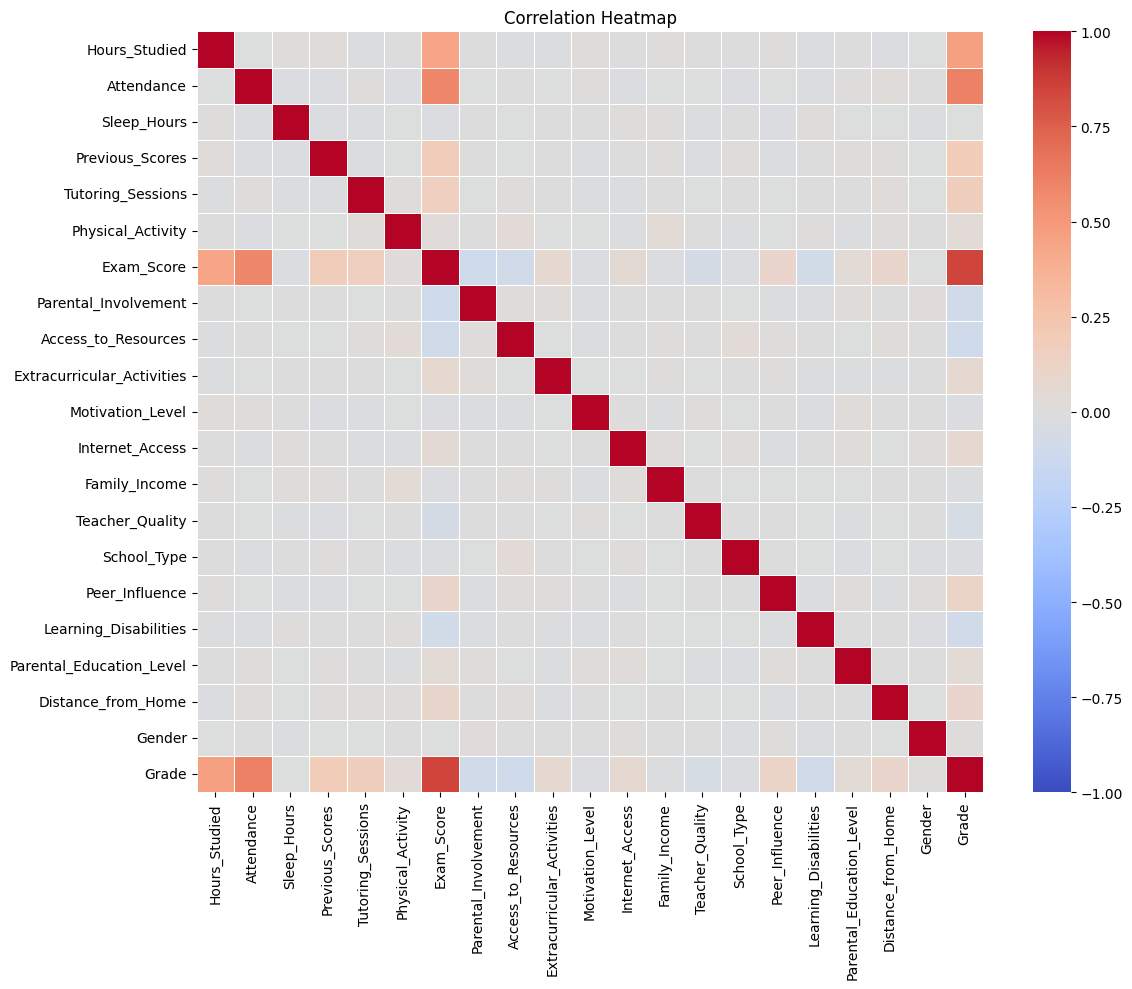

In [279]:
from sklearn.preprocessing import OrdinalEncoder

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

#Ordinal encoding
grade_order = ['D', 'C', 'B', 'A']
grade_encoder = OrdinalEncoder(categories=[grade_order])
df_encoded['Grade'] = grade_encoder.fit_transform(df_encoded[['Grade']])

# Perform ordinal encoding on other categorical columns
other_cat_columns = [col for col in categorical_columns if col != 'Grade']
other_encoder = OrdinalEncoder()
df_encoded[other_cat_columns] = other_encoder.fit_transform(df_encoded[other_cat_columns])

# Combine numerical columns with encoded categorical columns
final_df = pd.concat([df_encoded[numerical_columns], df_encoded[categorical_columns]], axis=1)

# Calculate the correlation matrix
corr_matrix = final_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [280]:
#split the target variable
X = final_df.drop(['Grade',"Exam_Score"], axis=1)
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)  # Choose top 10 features
y = final_df['Grade']
X_selected = selector.fit_transform(X, y)

In [281]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_selected)

In [282]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

## SVM

In [283]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']})

## KNN

In [284]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3,4,5,6],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', "minkowski"]
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best score: 0.6901204125136832


### Evaluate

In [285]:
# Evaluate
from sklearn.metrics import accuracy_score, classification_report

svm_pred = svm_grid.predict(X_test)
knn_pred = grid_search.predict(X_test)

# print("SVM Performance:")
print(classification_report(y_test, svm_pred))
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred)}")

print("\nKNN Performance:")
print(classification_report(y_test, knn_pred))
print(f"KNN Accuracy: {accuracy_score(y_test, knn_pred)}")

              precision    recall  f1-score   support

         0.0       0.56      0.42      0.48        24
         1.0       0.87      0.84      0.85       415
         2.0       0.85      0.90      0.88       639
         3.0       0.86      0.76      0.80       198

    accuracy                           0.85      1276
   macro avg       0.78      0.73      0.75      1276
weighted avg       0.85      0.85      0.85      1276

SVM Accuracy: 0.8518808777429467

KNN Performance:
              precision    recall  f1-score   support

         0.0       0.60      0.12      0.21        24
         1.0       0.76      0.62      0.68       415
         2.0       0.69      0.86      0.77       639
         3.0       0.78      0.54      0.63       198

    accuracy                           0.72      1276
   macro avg       0.71      0.53      0.57      1276
weighted avg       0.72      0.72      0.71      1276

KNN Accuracy: 0.7170846394984326


## Model Performance Summary

### Accuracies

- SVM model: 85.19%
- KNN model: 71.71%

**Note:** The SVM model outperforms the KNN model by 13.48 percentage points.

### Conclusion

The results of the models show that the SVM model with a radial basis kernel outperformed the KNN model. This is likely due to the fact that the SVM model is better suited to handle non-linear relationships in the data. The KNN model is also more sensitive to outliers in the data, which could have negatively impacted its performance. Overall, the SVM model is a better choice for this dataset.